# The problem: 

Given the movies dataset, famously found on Kaggle, would you please cluster them into three groups :

- must
- possible
- never

You can direct the challenge your own way but put in mind the following three notes
Python or R is recommended but any programming language would be ok 
The solution data independent. ( i.e. new movies can or might be added to the dataset)
Try to make your code library independent as much as possible.

# Approche

I will use **K-Means** Clustering Algorithm to solve the problem.

# Data Exploration and Wrangling

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [125]:
movies_df = pd.read_csv('movie_metadata.csv')

In [3]:
movies_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
movies_df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [5]:
movies_df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

Now that we have a good idea about the data, I'll do the following:
<br>
- Fill or remove the missing values
- Convert string values to numerical values.
- Drop unwanted columns

### Convert categorical values to numerical values.

In [126]:
# replace the numerical index with the movie_title
movies_df = movies_df.set_index('movie_title')

In [127]:
# replace the color value with boolean
movies_df = movies_df.replace({'color': {'Color': 1, ' Black and White': 0}})

In [128]:
# replace the languages and countries values with unique codes
languages = movies_df.language.unique()
countries = movies_df.country.unique()

languages_codes = np.arange(len(languages))
countries_codes = np.arange(len(countries))

In [129]:
def replace(df, column, old_list, new_list):
    for old, new in zip(old_list, new_list):
        df[column].replace(old, new, inplace=True)

In [130]:
replace(movies_df, 'language', languages, languages_codes)
replace(movies_df, 'country', countries, countries_codes)

In [131]:
# retrieve 2 list, one of the string columns and one of the numerical columns
def columns(df):
    str_list = [] # empty list to contain columns with strings (words)
    for col_name, col_value in df.iteritems():
        if type(col_value[1]) == str:
             str_list.append(col_name)
    # Get to the numeric columns by inversion            
    num_list = df.columns.difference(str_list)
    return str_list, num_list

In [132]:
str_list, num_list = columns(movies_df)

### Fill or remove the missing values

In [133]:
def meanFill(df, column):
    df[column] = df[column].apply(lambda x: x if not pd.isnull(x) else df[column].mean())

In [134]:
# replace the nulls with 1
movies_df['color'] = movies_df['color'].apply(lambda x: x if not pd.isnull(x) else movies_df['color'].mode()[0])
# replace the nulls with the most repeated language
movies_df['language'] = movies_df['language'].apply(lambda x: x if not pd.isnull(x) else movies_df['language'].mode()[0])
# replace the nulls with the most repeated country
movies_df['country'] = movies_df['country'].apply(lambda x: x if not pd.isnull(x) else movies_df['country'].mode()[0])

In [135]:
for column in num_list:
    meanFill(movies_df, column)

### Drop unwanted columns

I'll use Principal Component Analysis (PCA) to extract the important features

In [136]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [137]:
num = movies_df[num_list]

In [138]:
# convert it to numpy arrays
X = num.values
# Scaling the values
X = scale(X)
# number of features to explore
pca = PCA(n_components = 19)
pca.fit(X)
# The amount of variance that each PC explains
var = pca.explained_variance_ratio_
# Cumulative Variance explains
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4) * 100)

print (var1)

[  23.3    34.54   43.2    51.25   56.72   62.05   67.16   71.91   76.6
   81.08   85.05   88.61   91.25   93.59   95.76   97.82   99.21  100.01
  100.02]


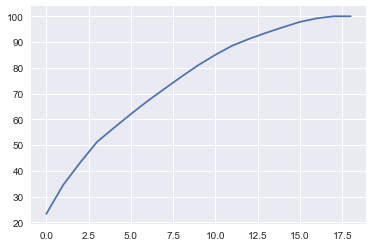

In [139]:
plt.plot(var1)

Looking at above plot, about 11 features represents 90 of the data
<br>
Some columns are not relevant to the quality of the movie. Like *title_year*
<br>
I will assume that a movies' *imdb_score* is the most important indicator of the quality. So I'll drop any column that does not have any correlation to it.

In [140]:
def Scatter_Plot(df, x_axis, y_axis):
    plt.scatter(df[x_axis], df[y_axis])
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.show()

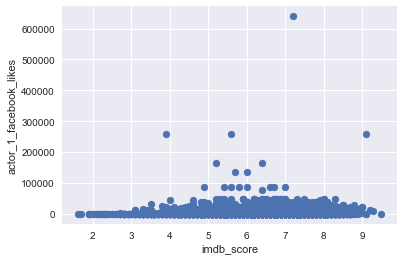

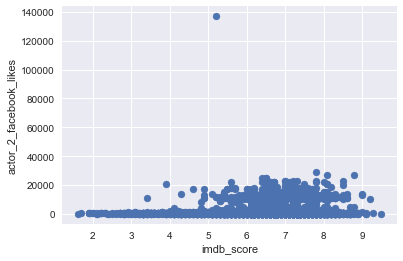

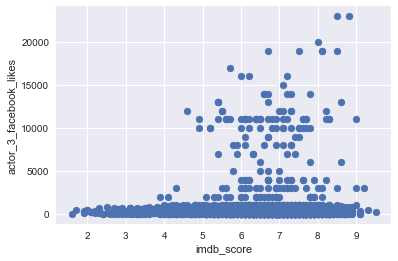

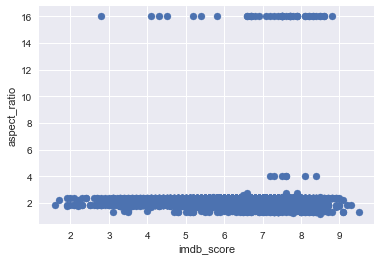

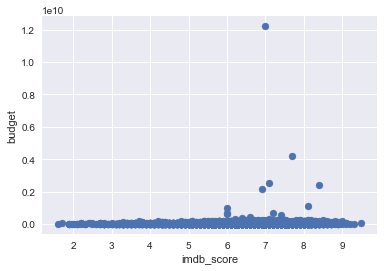

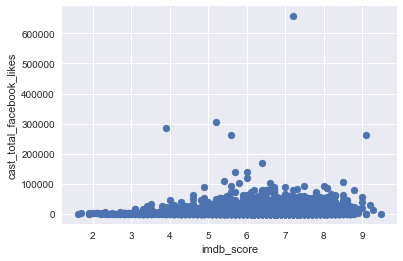

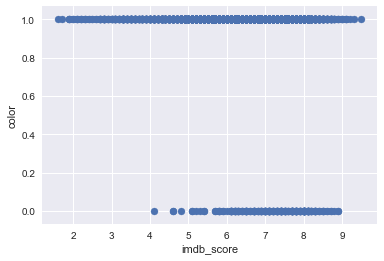

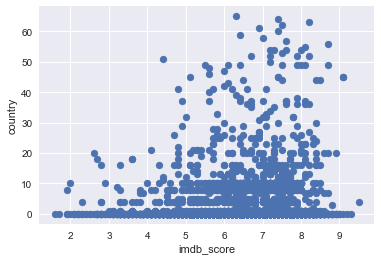

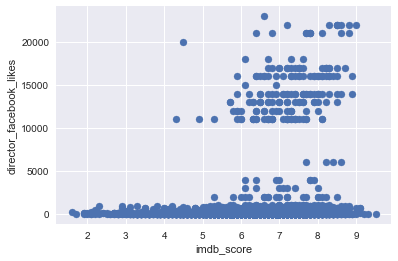

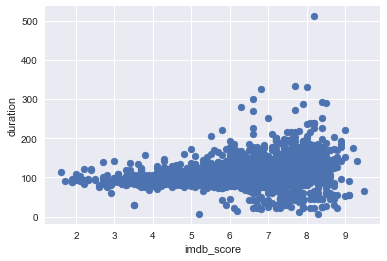

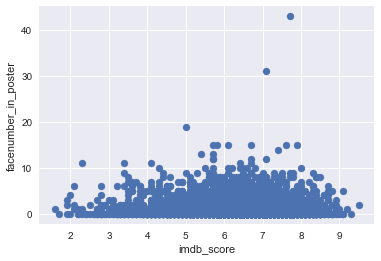

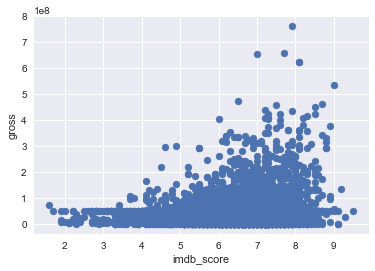

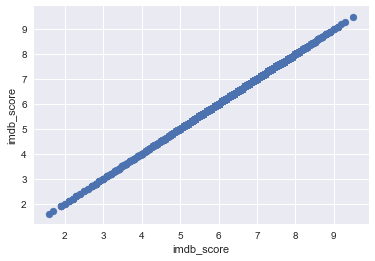

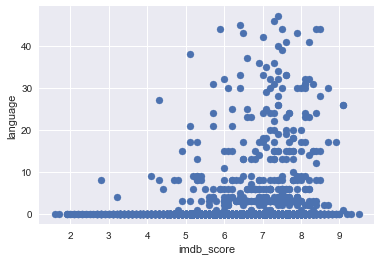

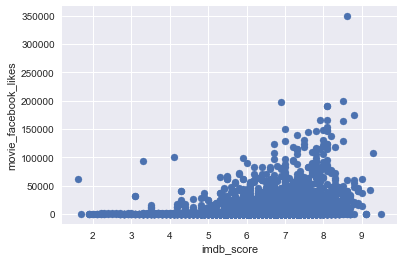

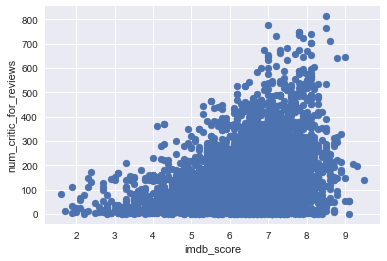

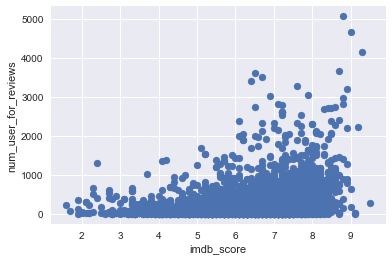

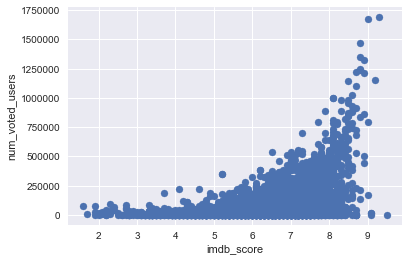

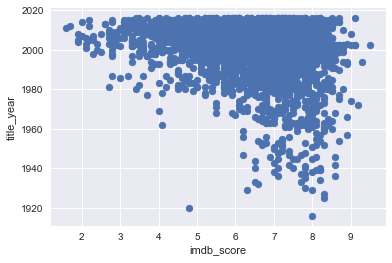

In [141]:
# plots each column against imdb_score in a separate graph
for col_name in num_list:
    Scatter_Plot(movies_df, "imdb_score", col_name)

From the graphs above we can see the important features. Now, lets drop some columns.

In [142]:
Movies_df = movies_df[num_list]

In [143]:
Movies_df = Movies_df.drop('actor_1_facebook_likes', axis=1)
Movies_df = Movies_df.drop('actor_2_facebook_likes', axis=1)
Movies_df = Movies_df.drop('cast_total_facebook_likes', axis=1)
Movies_df = Movies_df.drop('aspect_ratio', axis=1)
Movies_df = Movies_df.drop('budget', axis=1)
Movies_df = Movies_df.drop('facenumber_in_poster', axis=1)
Movies_df = Movies_df.drop('color', axis=1)
Movies_df = Movies_df.drop('title_year', axis=1)

# K-Means

Now we are ready to statr clustring our data.
First, i'll split the data into training and testing data

In [144]:
kmeans = KMeans(init='k-means++', n_clusters=3, random_state=42)
model = kmeans.fit(Movies_df)

In [145]:
# index of the centroid the i’th observation is closest to.
labels = model.labels_
print (labels[0:100])

[2 2 1 2 0 0 2 1 2 2 2 1 1 2 1 2 1 2 2 1 2 2 1 2 0 1 2 2 0 2 2 2 2 2 2 2 2
 2 2 1 1 1 1 2 1 2 1 2 2 0 1 1 1 2 2 1 2 1 2 1 1 1 0 1 2 1 2 2 1 2 0 1 1 1
 1 1 1 1 2 2 2 1 2 1 0 0 2 2 1 1 1 0 1 1 1 2 1 2 0 2]


In [146]:
# cluster-distance space of each point
points = model.transform(Movies_df)
points[0:5]

array([[  7.32781068e+08,   6.35927967e+08,   4.39120196e+08],
       [  2.81679210e+08,   1.84826100e+08,   1.19817737e+07],
       [  1.72349085e+08,   7.54959941e+07,   1.21311833e+08],
       [  4.20406838e+08,   3.23553799e+08,   1.26746676e+08],
       [  2.07432214e+07,   7.61101122e+07,   2.72917844e+08]])

Now, I'll plot our model to see if we have 3 distinguishable clusters.
<br>
I used the method used in the link below to plot the results together with the cluster centroids.
<br>
https://stackoverflow.com/questions/32008994/seaborn-scatterplot-matrix-adding-extra-points-with-custom-styles

In [147]:
sns.set_color_codes()

Movies_df["label"] = labels.astype(str)
col = Movies_df.columns
col = col[0:11]

In [148]:
centroids = pd.DataFrame(model.cluster_centers_, columns = col)
centroids["label"] = ["0 centroid", "1 centroid", "2 centroid"]
full_ds = pd.concat([Movies_df, centroids], ignore_index=True)

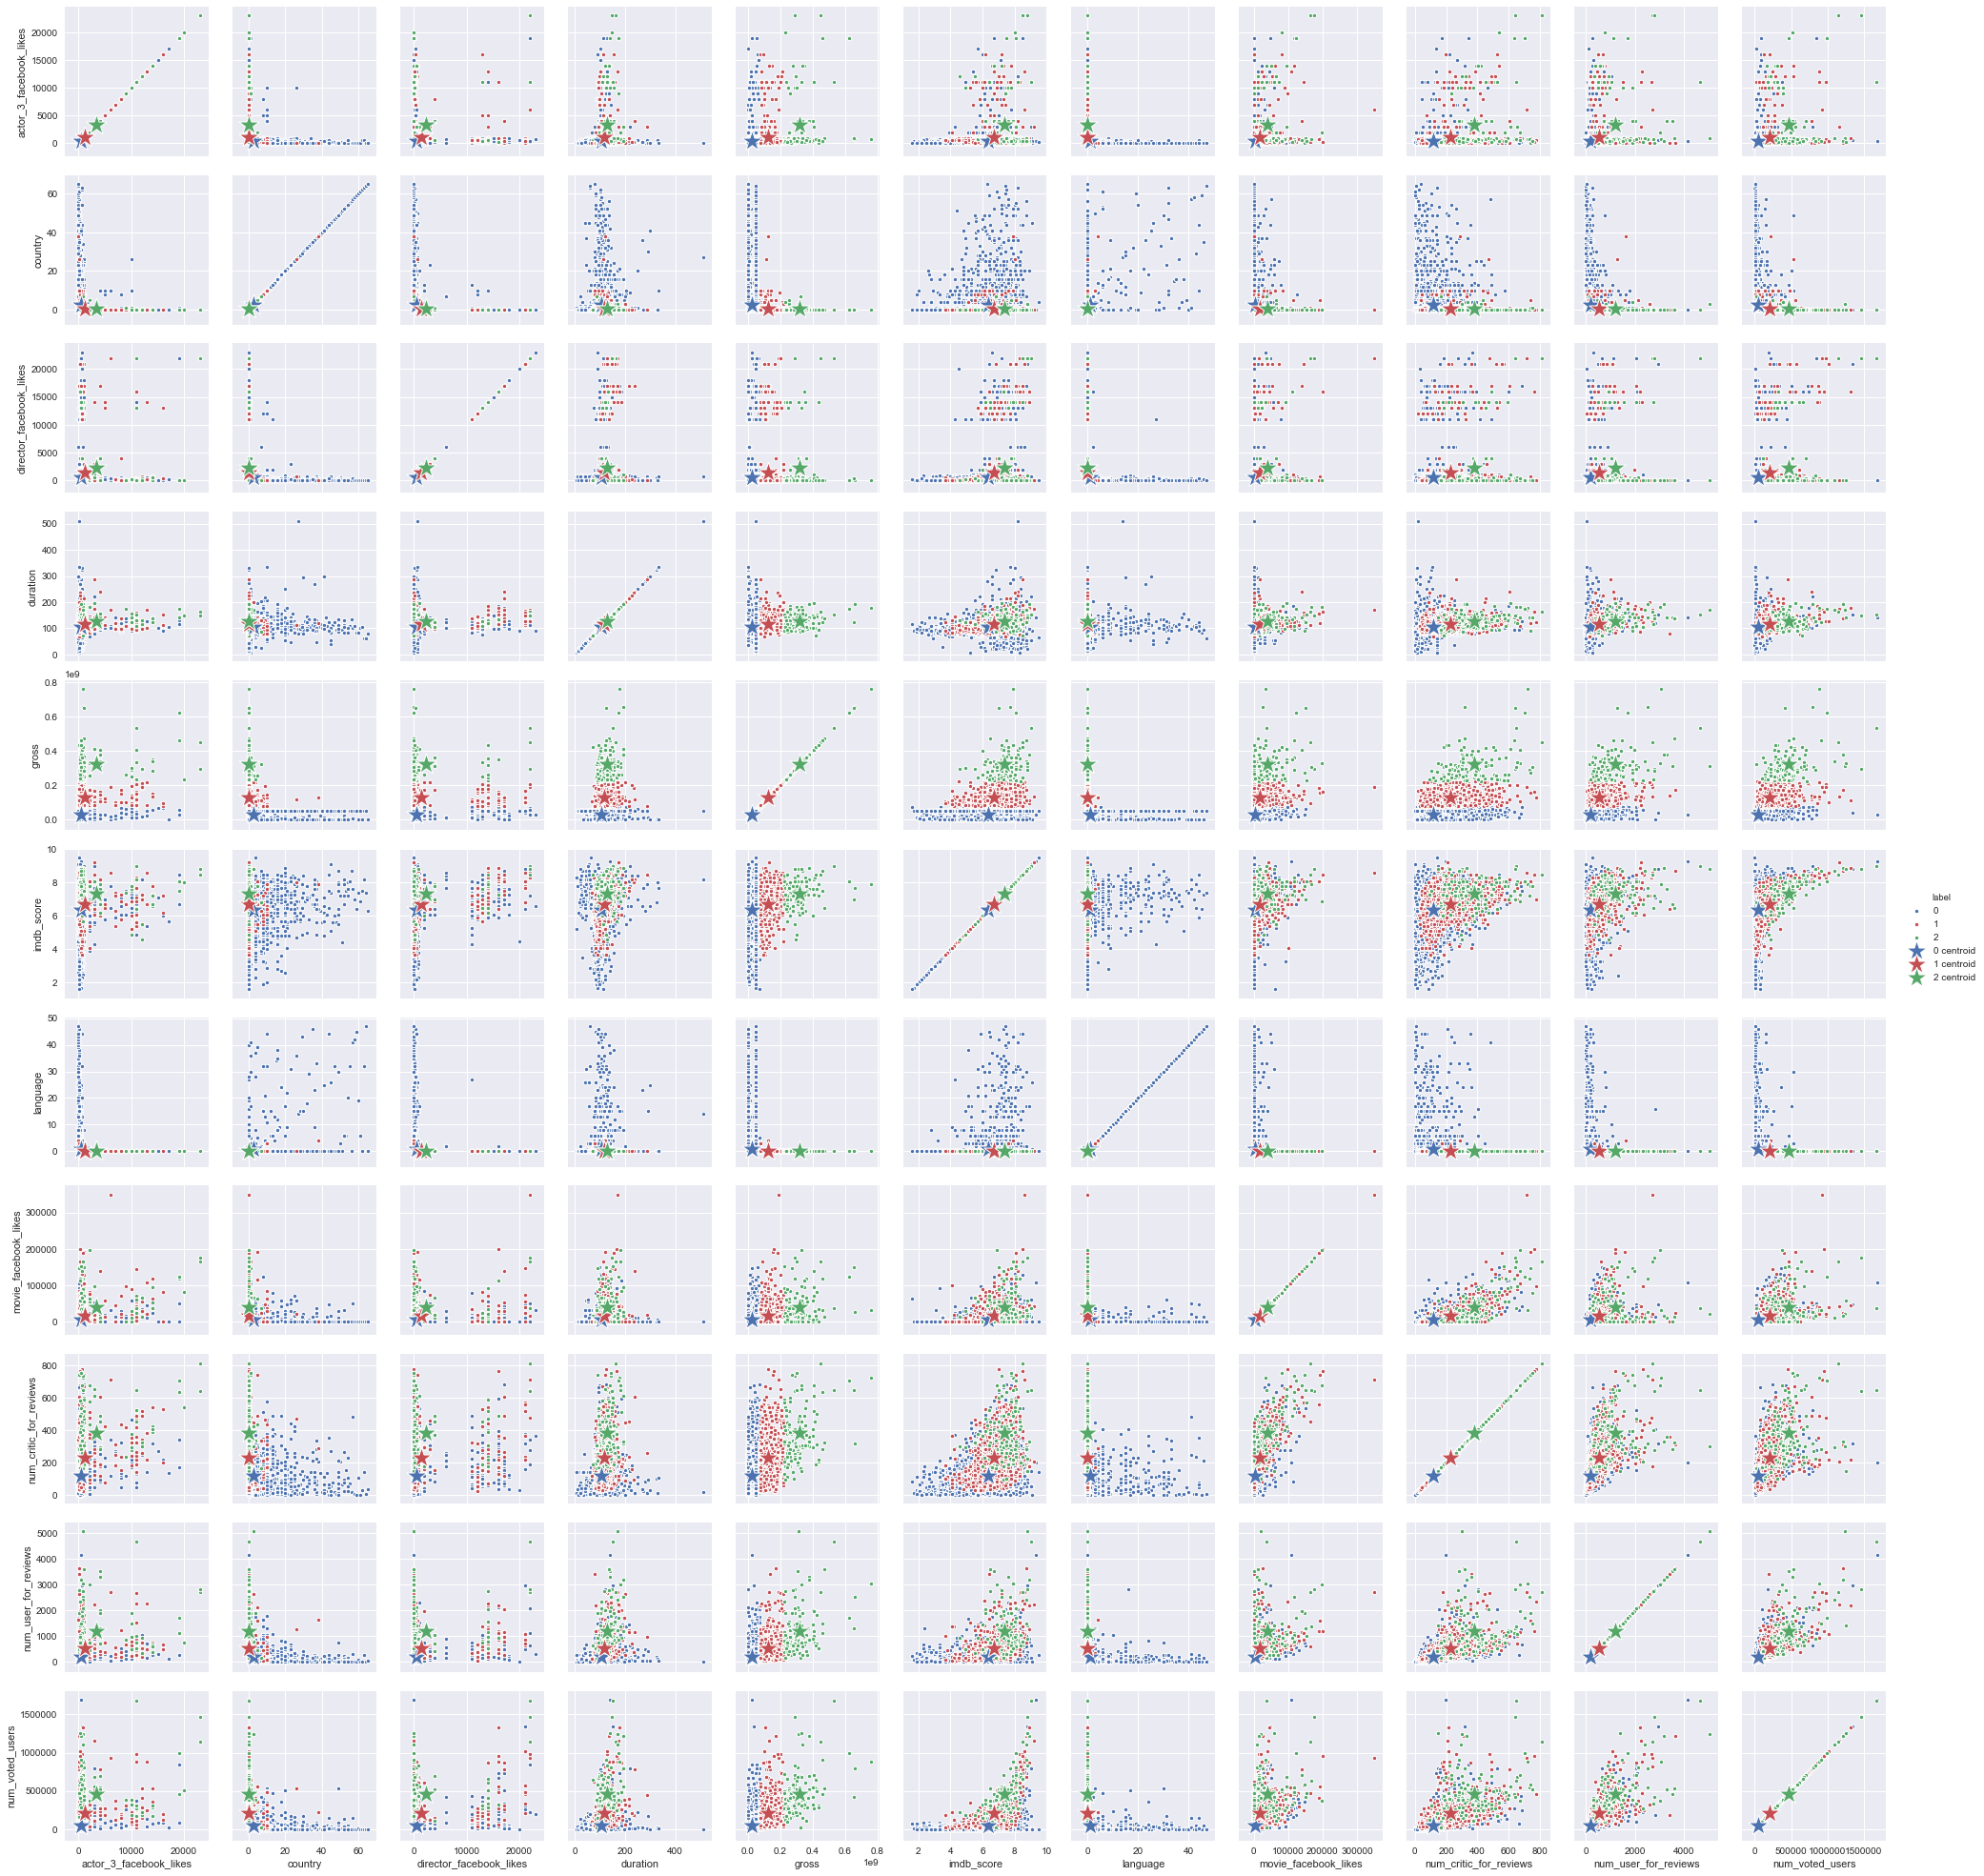

In [149]:
g = sns.PairGrid(full_ds, hue="label",
                 hue_order=["0", "1", "2", "0 centroid", "1 centroid", "2 centroid"],
                 palette=["b", "r", "g", "b", "r", "g"],
                 hue_kws={"s": [20, 20, 20, 500, 500, 500],
                          "marker": ["o", "o", "o", "*", "*", "*"]})
g.map(plt.scatter, linewidth=1, edgecolor="w")
g.add_legend()

Clearly, after zooming in, we can see 3 clusters. From our previous feature selection, we know that the higher the value, the better movie quality we will get. That means:
- cluster 0 : Never
- cluster 1 : Possible
- cluster 2 : Must
<br>

Next, let's return the *language* and *country* to the original form and then split it into 3 data frames.

In [150]:
Movies_df = Movies_df.replace({'label': {'0': 'Never', '1': 'Possible', '2': 'Must'}})

In [151]:
replace(Movies_df, 'language', languages_codes, languages)
replace(Movies_df, 'country', countries_codes, countries)

In [152]:
replace(movies_df, 'language', languages_codes, languages)
replace(movies_df, 'country', countries_codes, countries)

In [153]:
must_df = Movies_df[Movies_df.label == 'Must']
possible_df = Movies_df[Movies_df.label == 'Possible']
never_df = Movies_df[Movies_df.label == 'Never']

Now we have 3 data frame, one for each cluster.

I'll create a function that recommend a movie(s) based on what data frame you pass.

In [154]:
def recommender(movies_df, num_movies):
    recommendations = movies_df.take(np.random.permutation(len(movies_df))[:num_movies])
    print (recommendations.imdb_score)

In [156]:
# random 5 must watch movies
recommender(must_df, 5)

movie_title
Harry Potter and the Prisoner of Azkaban     7.8
Brave                                        7.2
The Dark Knight                              9.0
Jurassic Park                                8.1
Monsters, Inc.                               8.1
Name: imdb_score, dtype: float64


In [157]:
# random 5 never watch movies
recommender(never_df, 5)

movie_title
In the Name of the King: The Last Job     3.3
Quartet                                   6.8
Ajami                                     7.4
Dragonfly                                 6.1
Beneath Hill 60                           7.1
Name: imdb_score, dtype: float64


In [158]:
print ('MUST')
print ('Maximum IMDB score: ' , must_df.imdb_score.max())
print ('Minimum IMDB score: ' , must_df.imdb_score.min())
print ('Average IMDB score: ' , must_df.imdb_score.mean())

MUST
('Maximum IMDB score: ', 9.0)
('Minimum IMDB score: ', 4.5999999999999996)
('Average IMDB score: ', 7.35511811023622)


In [159]:
print ('NEVER')
print ('Maximum IMDB score: ' , never_df.imdb_score.max())
print ('Minimum IMDB score: ' , never_df.imdb_score.min())
print ('Average IMDB score: ' , never_df.imdb_score.mean())

NEVER
('Maximum IMDB score: ', 9.5)
('Minimum IMDB score: ', 1.6000000000000001)
('Average IMDB score: ', 6.3661534817622)


In [160]:
print ('POSSIBLE')
print ('Maximum IMDB score: ' , possible_df.imdb_score.max())
print ('Minimum IMDB score: ' , possible_df.imdb_score.min())
print ('Average IMDB score: ' , possible_df.imdb_score.mean())

POSSIBLE
('Maximum IMDB score: ', 9.1999999999999993)
('Minimum IMDB score: ', 3.7000000000000002)
('Average IMDB score: ', 6.737319884726218)


In [161]:
def Scatter(df1, df2, df3, y_axis):
    ax = df1.plot(kind='scatter', x='imdb_score', y=y_axis, color='Red', alpha=0.1, label='must')
    ax2 = df2.plot(kind='scatter', x='imdb_score', y=y_axis, color='Blue', alpha=0.1, label='never', ax = ax)
    df3.plot(kind='scatter', x='imdb_score', y=y_axis, color='Green', alpha=0.1, label='possible', ax = ax2)

    plt.show()

In [162]:
strList, numList = columns(must_df)

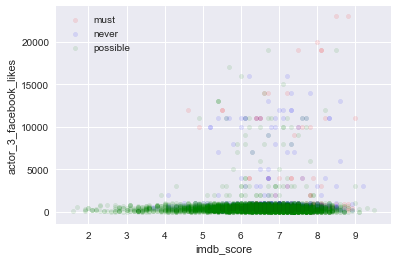

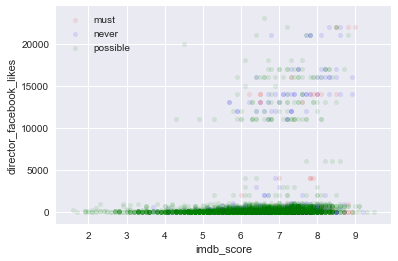

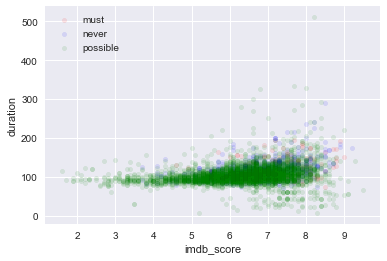

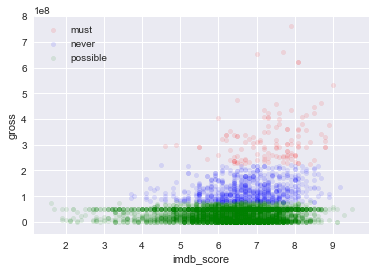

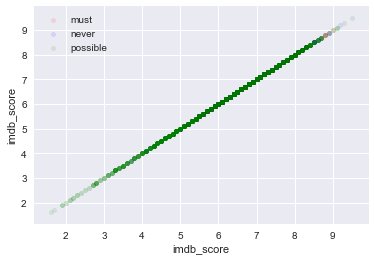

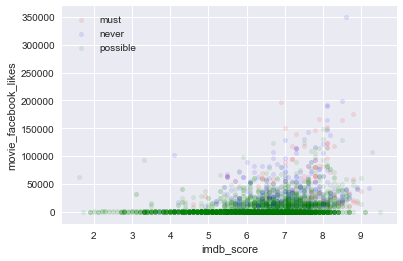

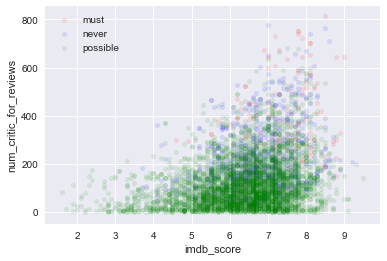

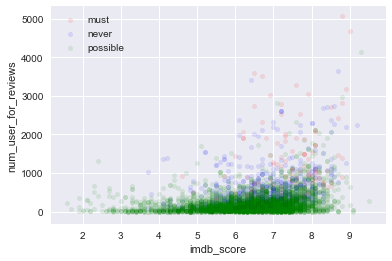

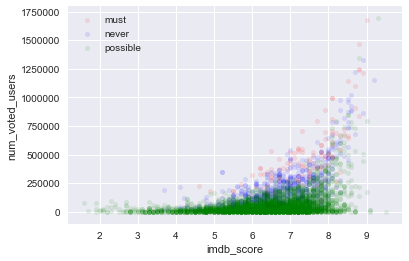

In [69]:
for col_name in numList:
    Scatter(must_df, possible_df, never_df, col_name)

The graph above shows each clusters' correlation to the *imdb_score*.
The correlation is not clear as I hoped it will be.

Another way to split the data without using KMeans, is simply based on the *imdb_score*.
<br>
All of<a href= http://www.imdb.com/chart/top?ref_=nv_mv_250_6> IMDB top 250 </a>movies scores are 8.0 and above.
<br>
The <a href= http://www.imdb.com/chart/bottom> IMDB bottom 100</a> movies scores are 3.0 and below.
<br>
Now, I'll split the data to 3 dataframes:
- **Must**: all movies with an IMDB score of 8.0 and above.
- **Possible**: all movies with an IMDB score between 8.0 and 3.0.
- **Never**: all movies with an IMDB score of 3.0 and below.

In [163]:
imdb_must_df = movies_df[movies_df.imdb_score >= 8]
imdb_never_df = movies_df[movies_df.imdb_score <= 3]

In [164]:
imdb_possible_df = movies_df[movies_df.imdb_score > 3]
imdb_never_df = imdb_never_df[imdb_never_df.imdb_score < 8]

In [165]:
print ('Maximum IMDB score: ' , imdb_must_df.imdb_score.max())
print ('Minimum IMDB score: ' , imdb_must_df.imdb_score.min())
print ('Average IMDB score: ' , imdb_must_df.imdb_score.mean())

('Maximum IMDB score: ', 9.5)
('Minimum IMDB score: ', 8.0)
('Average IMDB score: ', 8.272560975609746)


In [114]:
print ('Maximum IMDB score: ' , imdb_possible_df.imdb_score.max())
print ('Minimum IMDB score: ' , imdb_possible_df.imdb_score.min())
print ('Average IMDB score: ' , imdb_possible_df.imdb_score.mean())

('Maximum IMDB score: ', 9.5)
('Minimum IMDB score: ', 3.1000000000000001)
('Average IMDB score: ', 6.478266960176101)


In [113]:
print ('Maximum IMDB score: ' , imdb_never_df.imdb_score.max())
print ('Minimum IMDB score: ' , imdb_never_df.imdb_score.min())
print ('Average IMDB score: ' , imdb_never_df.imdb_score.mean())

('Maximum IMDB score: ', 3.0)
('Minimum IMDB score: ', 1.6000000000000001)
('Average IMDB score: ', 2.5173913043478255)


In [107]:
recommender(imdb_must_df, 5)

movie_title
Das Boot           8.4
Hotel Rwanda       8.1
Braveheart         8.4
The Wild Bunch     8.0
Casino Royale      8.0
Name: imdb_score, dtype: float64


In [108]:
recommender(imdb_never_df, 5)

movie_title
The Vatican Exorcisms     2.6
Inchon                    2.7
Baby Geniuses             2.5
Date Movie                2.7
Gigli                     2.4
Name: imdb_score, dtype: float64


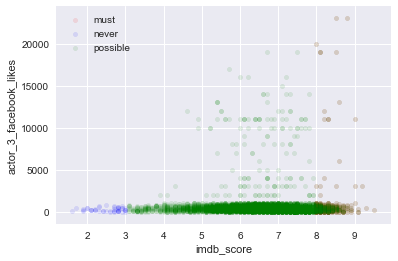

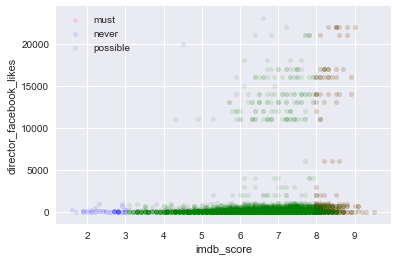

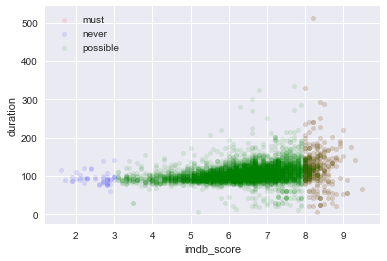

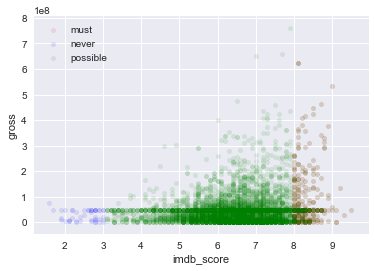

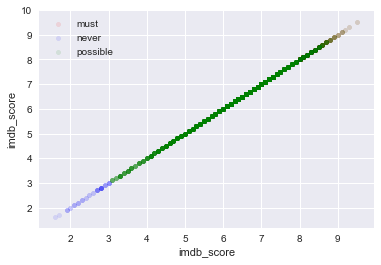

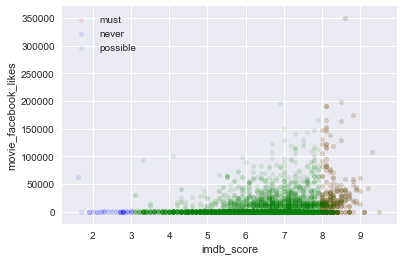

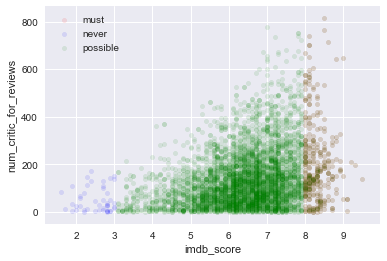

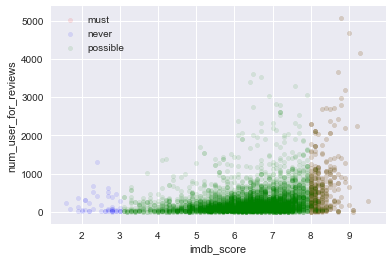

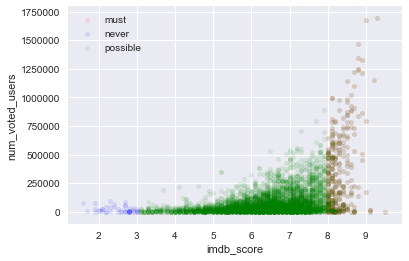

In [74]:
for y in numList:
    Scatter(imdb_must_df, imdb_never_df, imdb_possible_df, y)

The graph above shows each clusters' correlation to the *imdb_score*.

In [166]:
# write the data to csv files
must_df.to_csv('must.csv')
possible_df.to_csv('possible.csv')
never_df.to_csv('never.csv')
imdb_must_df.to_csv('imdb_must.csv')
imdb_possible_df.to_csv('imdb_possible.csv')
imdb_never_df.to_csv('imdb_never.csv')

# Conclusion

### Problems Faced And How To Improve:
- For the feature selection, I had to make a naive assumption about the quality of the movie, which is it mainly depends on the **imdb_score**. So I plotted each feature against the imdb rating and kept the features that seems it had a correlation.
- The K-Means model was 11-d, I could not plot the model in 2-d. Hence, I plotted each feature against the model.
- I used PCA to show me the important features, but couldn't extract them.
- Although my assumption was based in the **imdb_score** for the KMeans clustering, the generated clusters did not have a strong correlation to it. However, they did a good job in clustering the data.
<br>

In the end, I enjoyed doing this project although there is room for improvements that can be done.